<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1MleNI0rcICpvrGd7SdYuQz7dn8NlAlEc" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Low Code ML with PyCaret (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>SIT Academy, 2022</center>

# Low Code ML with PyCaret (Live coding)

## Loading Dependencies

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 50.6 MB/s 
     |████████████████████████████████| 4.8 MB 41.7 MB/s 
     |████████████████████████████████| 17.0 MB 48.6 MB/s 
     |████████████████████████████████| 167 kB 45.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 1.7 MB 57.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 38.7 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 325 kB 48.7 MB/s 
     |████████████████████████████████| 2.0 MB 51.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 

In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 5.3 MB/s 
     |████████████████████████████████| 569 kB 43.3 MB/s 
     |████████████████████████████████| 756 kB 12.2 MB/s 
     |████████████████████████████████| 275 kB 46.7 MB/s 
     |████████████████████████████████| 6.0 MB 37.3 MB/s 
     |████████████████████████████████| 9.9 MB 17.7 MB/s 
     |████████████████████████████████| 3.6 MB 42.3 MB/s 
     |████████████████████████████████| 280 kB 9.3 MB/s 
     |████████████████████████████████| 125 kB 38.9 MB/s 
     |████████████████████████████████| 254 kB 45.5 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 115 kB 43.2 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0dde41aa459c974e2e7135eeedae78415eacb441ca89df8d5f411fd0b5630e38
  St

In [ ]:
!pip install -U jinja2 # https://github.com/pycaret/pycaret/issues/2591 to bypass import errors later on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
# check version
from pycaret.utils import version
version()

'2.3.10'

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Loading Dataset

In [ ]:
from sklearn.datasets import load_boston
res = load_boston(return_X_y=False)

X = res.data
y = res.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
print(res.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
import pandas as pd
import numpy as np

features = res.feature_names

X = pd.DataFrame(X, columns=features)
y = pd.DataFrame({'Price': [1 if hp > 30 else 0 for hp in y]})

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

,Price
0,0
1,0
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Initialize Setup

In [ ]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Price', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='boston1')

,Description,Value
0,session_id,13
1,Target,Price
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(404, 14)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/11/23 07:51:38 INFO mlflow.tracking.fluent: Experiment with name 'boston1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume

## Compare Baseline

In [ ]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9612,0.9805,0.8356,0.9292,0.8741,0.8516,0.8570,0.544
lightgbm,Light Gradient Boosting Machine,0.9505,0.9730,0.8333,0.8684,0.8458,0.8165,0.8200,0.184
et,Extra Trees Classifier,0.9435,0.9789,0.7511,0.8929,0.8118,0.7793,0.7858,0.518
gbc,Gradient Boosting Classifier,0.9398,0.9588,0.8111,0.8251,0.8127,0.7772,0.7807,0.110
lda,Linear Discriminant Analysis,0.9397,0.9461,0.7667,0.8642,0.8096,0.7741,0.7779,0.018
ada,Ada Boost Classifier,0.9363,0.9593,0.7911,0.8239,0.8047,0.7668,0.7687,0.106
dt,Decision Tree Classifier,0.9292,0.8754,0.7933,0.7883,0.7831,0.7413,0.7466,0.018
ridge,Ridge Classifier,0.9292,0.0000,0.6200,0.9267,0.7375,0.6995,0.7213,0.016
lr,Logistic Regression,0.9255,0.9721,0.7467,0.8003,0.7681,0.7241,0.7276,0.890
knn,K Neighbors Classifier,0.8617,0.7782,0.3822,0.6833,0.4821,0.4088,0.4365,0.144


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## Create Model

In [ ]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9123,0.9500,0.6000,0.8571,0.7059,0.6562,0.6706
1,0.9474,0.9681,0.8000,0.8889,0.8421,0.8106,0.8123
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9821,0.9976,1.0000,0.9000,0.9474,0.9367,0.9385
4,0.9643,0.9870,0.7778,1.0000,0.8750,0.8545,0.8637
Mean,0.9612,0.9805,0.8356,0.9292,0.8741,0.8516,0.8570
Std,0.0301,0.0190,0.1511,0.0595,0.1005,0.1176,0.1130


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Tune Hyperparameters

In [ ]:
tuned_rf = tune_model(rf, n_iter=50, optimize = 'f1', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9123,0.9362,0.6000,0.8571,0.7059,0.6562,0.6706
1,0.9123,0.9638,0.7000,0.7778,0.7368,0.6844,0.6858
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9821,0.9882,1.0000,0.9000,0.9474,0.9367,0.9385
4,0.9643,0.9716,0.7778,1.0000,0.8750,0.8545,0.8637
Mean,0.9542,0.9720,0.8156,0.9070,0.8530,0.8264,0.8317
Std,0.0360,0.0219,0.1608,0.0855,0.1150,0.1358,0.1327


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

## Ensemble Model

In [ ]:
en_rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9123,0.9500,0.6000,0.8571,0.7059,0.6562,0.6706
1,0.9474,0.9681,0.8000,0.8889,0.8421,0.8106,0.8123
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9821,0.9976,1.0000,0.9000,0.9474,0.9367,0.9385
4,0.9643,0.9870,0.7778,1.0000,0.8750,0.8545,0.8637
Mean,0.9612,0.9805,0.8356,0.9292,0.8741,0.8516,0.8570
Std,0.0301,0.0190,0.1511,0.0595,0.1005,0.1176,0.1130


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_rf = ensemble_model(en_rf, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9655,0.9667,0.8000,1.0000,0.8889,0.8688,0.8764
1,0.8966,0.9667,0.6000,0.7500,0.6667,0.6063,0.6116
2,0.8929,0.9792,0.5000,0.6667,0.5714,0.5116,0.5185
3,0.9643,0.9792,1.0000,0.8000,0.8889,0.8679,0.8756
4,0.9286,1.0000,0.5000,1.0000,0.6667,0.6316,0.6794
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9643,0.9913,1.0000,0.8333,0.9091,0.8871,0.8928
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                     

In [ ]:
boosted_rf = ensemble_model(en_rf, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9655,0.9708,0.8000,1.0000,0.8889,0.8688,0.8764
1,0.8966,0.9250,0.6000,0.7500,0.6667,0.6063,0.6116
2,0.9643,0.9896,0.7500,1.0000,0.8571,0.8372,0.8485
3,0.8929,0.9740,1.0000,0.5714,0.7273,0.6667,0.7071
4,0.9643,0.9740,0.7500,1.0000,0.8571,0.8372,0.8485
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9643,1.0000,1.0000,0.8333,0.9091,0.8871,0.8928
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
  

In [ ]:
boosted_rf

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

## Analyze Model

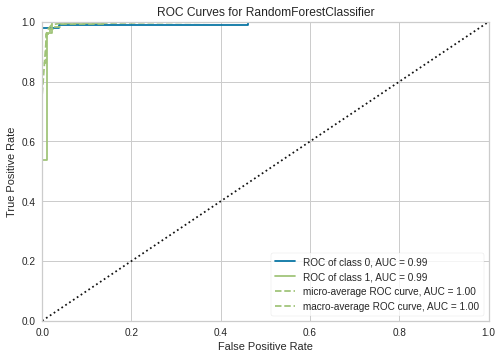

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf)

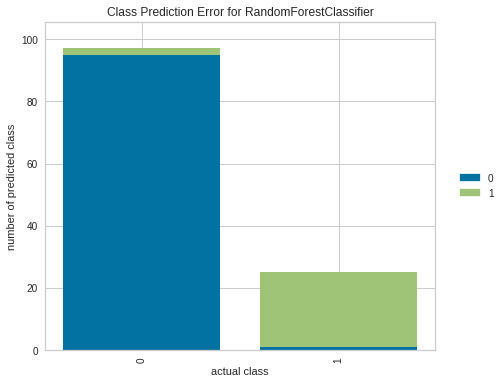

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot='error')

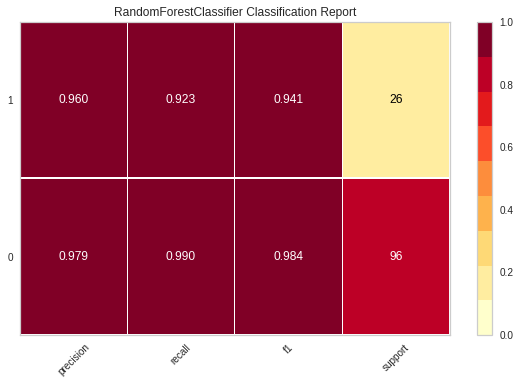

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot='class_report')

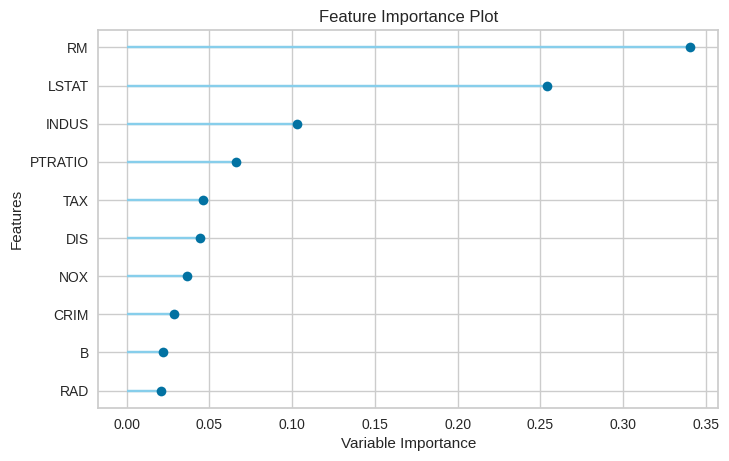

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpret Model

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


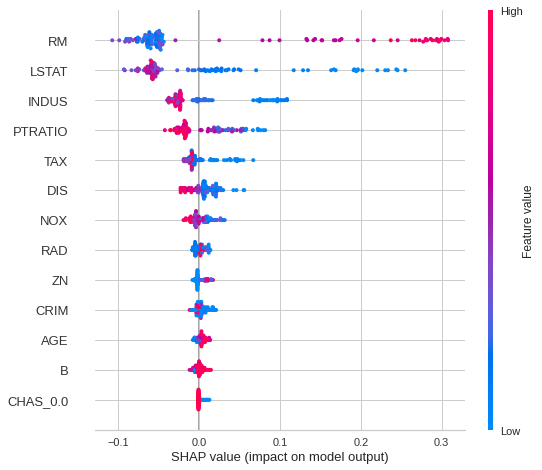

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=RM, kwargs={}, observation=None, plot=correlation, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: type 1


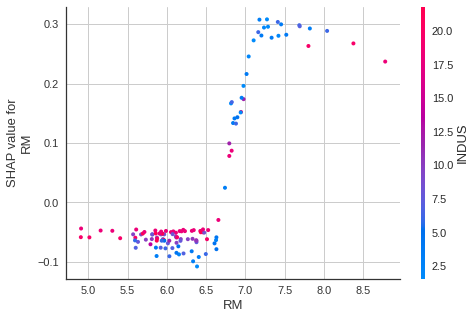

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf, feature="RM", plot = 'correlation')

In [ ]:
interpret_model(tuned_rf, plot = 'reason', observation = 12)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=12, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


## Predict Model

In [ ]:
predictions = predict_model(tuned_rf, data=X_test)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Label,Score
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,0,0.8761
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,1,0.5707
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,0,0.9907
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,0,0.9258
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,0,0.9902


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = predictions['Label']
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[90  1]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        91
           1       0.89      0.73      0.80        11

    accuracy                           0.96       102
   macro avg       0.93      0.86      0.89       102
weighted avg       0.96      0.96      0.96       102



## Save / Load Model

In [ ]:
save_model(tuned_rf, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), model_name=best-model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=10, max_features='log2',
                                         max_le

In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=best-model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=10, max_features='log2',
         

In [ ]:
predictions = predict_model(loaded_bestmodel, data=X_test)
predictions = predictions['Label']
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=10, max_feature

[[90  1]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        91
           1       0.89      0.73      0.80        11

    accuracy                           0.96       102
   macro avg       0.93      0.86      0.89       102
weighted avg       0.96      0.96      0.96       102

